# Matplotlib

In this section, we will introduce matplotlib, a package for plotting data and images that works nicely with NumPy. We will only cover the basics of plotting and key features of matplotlib. For a more in-depth look at the package, the [matplotlib user's guide](https://matplotlib.org/users/index.html) can be a resource.

If you use Anaconda as your Python distribution, then you already have matplotlib installed. The `matplotlib` module contains all of the functionality in matplotlib. However, we will often use the `matplotlib.pyplot` submodule for ease of use.

## Plotting in Jupyter Notebooks
While matplotlib provides a graphical interface for plots so that we can plot data from the Python shell or IPython, it is usually most convenient to plot inside a Jupyter notebook while you work on something. To set this up, we can use the following:

```python
import matplotlib.pyplot as plt
%matplotlib notebook
```

The `%matplotlib notebook` command tells Jupyter that we want matplotlib to use notebook mode. This will allow us to use interactive plots, which can be quite convenient.

## Figures and Axes
In matplotlib, a `figure` is the main object that holds a full plot. A set of `axes` contains most of the contents of a figure. For example, if we want to create a scatterplot, we'll create a `figure` and `axes` and we'll tell matplotlib to plot our data on the `axes` we create. We can add a title and axis labels to our `axes` object, which will be contained inside the `figure`. Note that a `figure` can have multiple `axes` associated with it, and a set of `axes` can have multiple plots on it.

We can easily create a figure and axes in a notebook and plot some data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


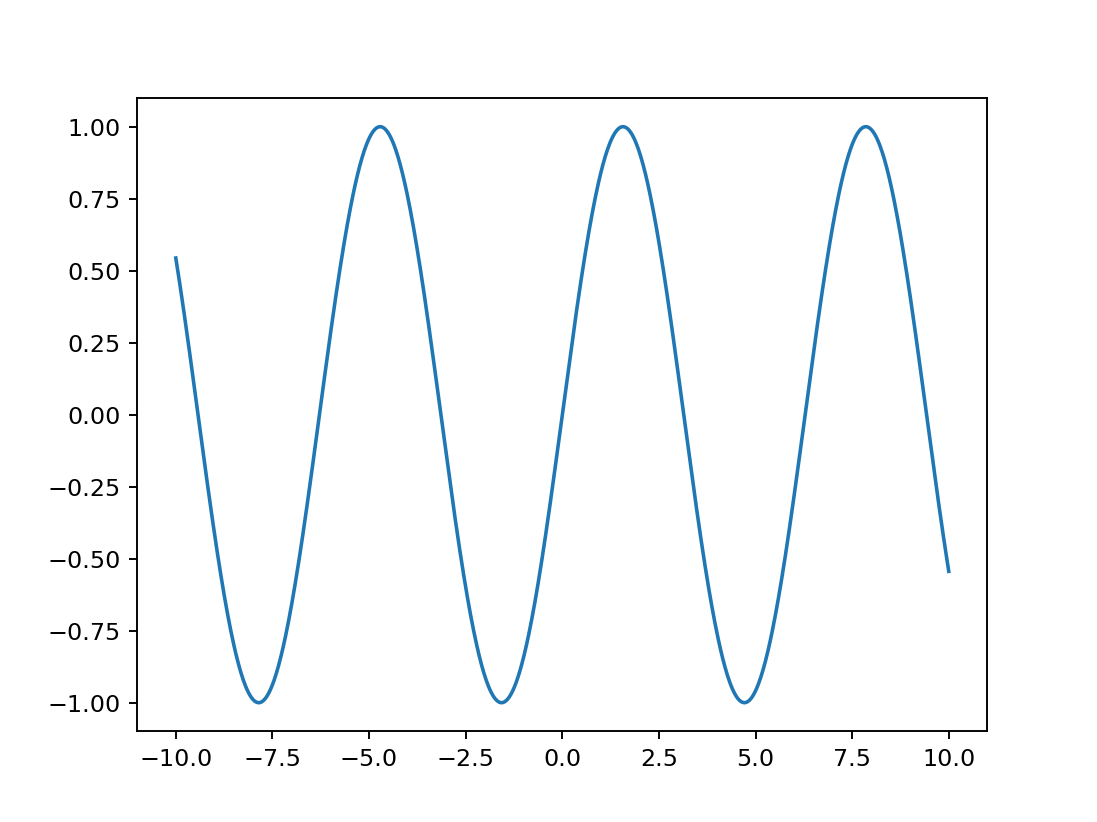

In [20]:
# create a figure and set of axes
fig, ax = plt.subplots()

# plot a simple function
x = np.linspace(-10, 10, 1000)
y = np.sin(x)

ax.plot(x, y);

<IPython.core.display.Javascript object>


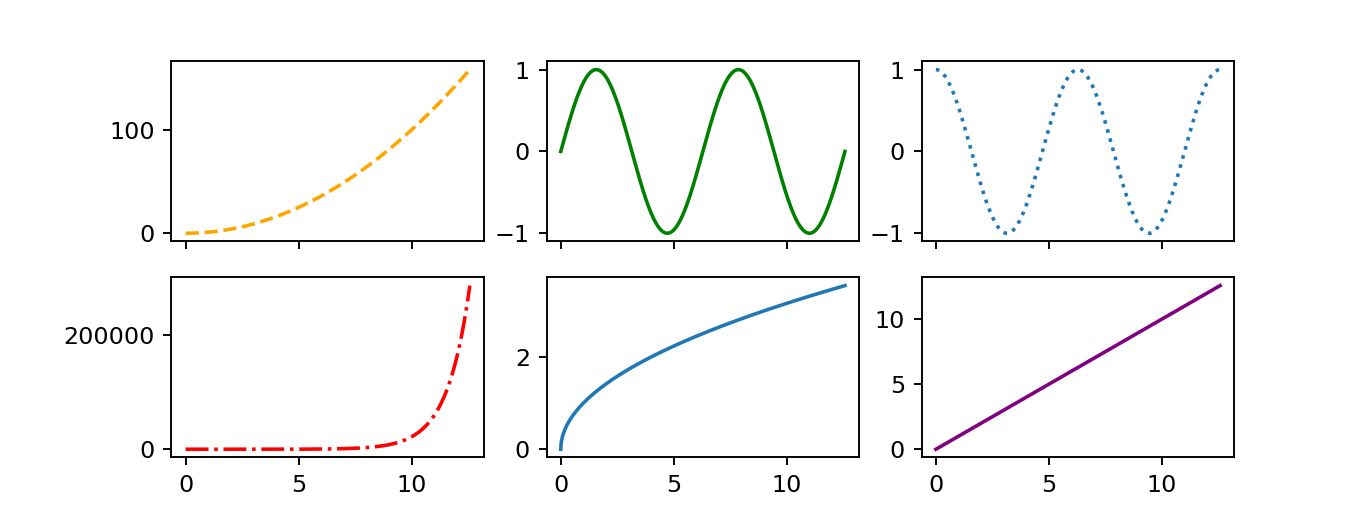

In [40]:
# create a figure with multiple axes
fig, axs = plt.subplots(2, 3, sharex=True, figsize=(8, 3)) # 6 axes on a 2x3 grid
# note that we could also use tuple unpacking for our axes:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(2, 3)

x = np.linspace(0, 4*np.pi, 1000)
axs[0, 0].plot(x, x**2, linestyle='--', color='orange')
axs[0, 1].plot(x, np.sin(x), color='green')
axs[0, 2].plot(x, np.cos(x), linestyle=':')
axs[1, 0].plot(x, np.exp(x), color='red', linestyle='-.')
axs[1, 1].plot(x, np.sqrt(x))
axs[1, 2].plot(x, x, color='purple');

<IPython.core.display.Javascript object>


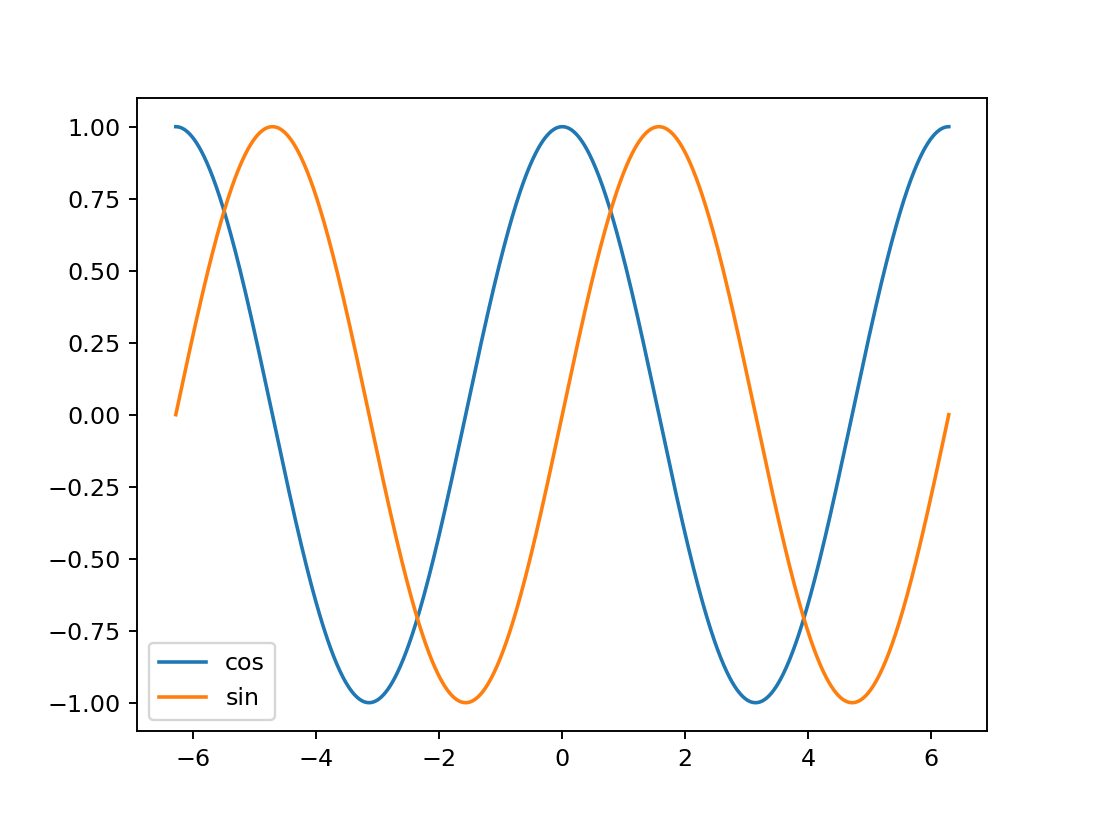

In [62]:
# create a set of axes with multiple plots
fig, ax = plt.subplots()

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
ax.plot(x, np.cos(x), label='cos')
ax.plot(x, np.sin(x), label='sin')
ax.legend();

## Basic Plotting
Above, we've seen how simple plotting can be using matplotlib. There are several convenient plot types we may want to use on a set of axes `ax`:

<IPython.core.display.Javascript object>


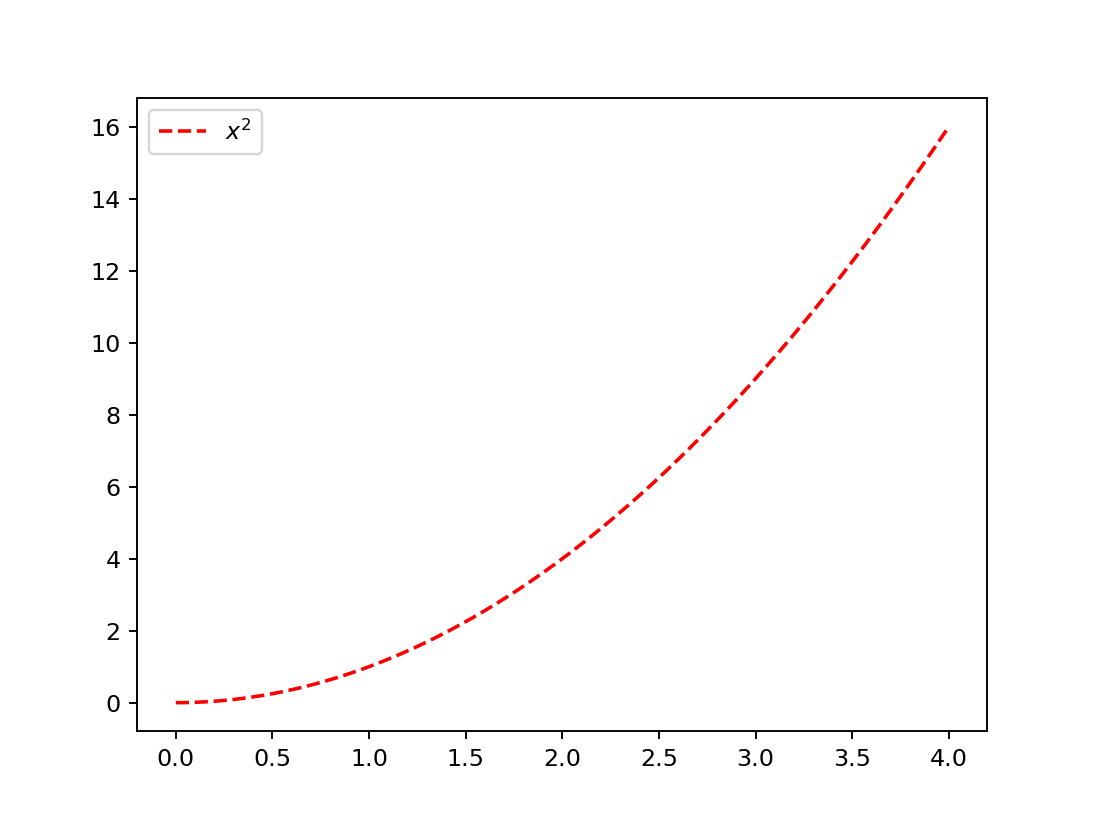

In [64]:
# We've seen plotting a set of points with
# lines above. We can also stylize the lines
# Demonstrating ax.plot
fig, ax = plt.subplots()

x = np.linspace(0, 4, 1000)
y = x**2
ax.plot(x, y, linestyle='--', color='red', label=r'$x^2$')
ax.legend();

<IPython.core.display.Javascript object>


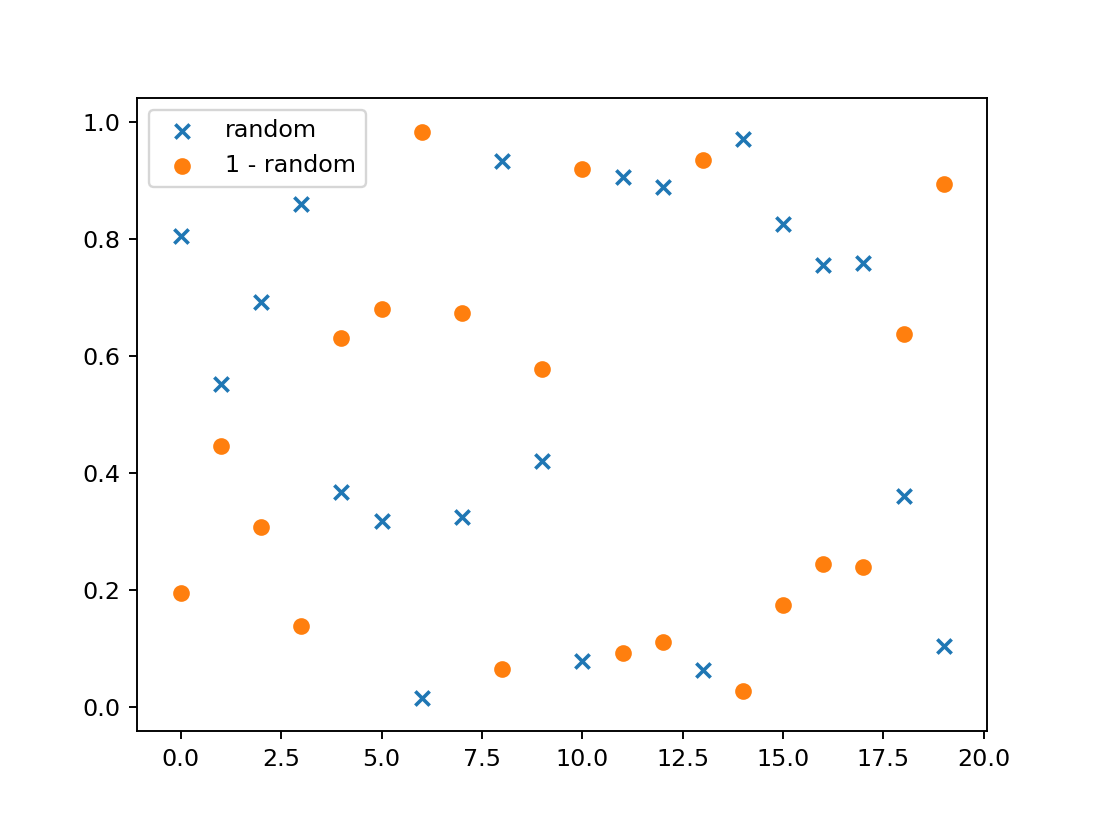

In [65]:
# demonstrating a scatter plot
x = np.arange(20)
y = np.random.random(20)

fig, ax = plt.subplots()
ax.scatter(x, y, marker='x', label='random')
ax.scatter(x, 1-y, marker='o', label='1 - random')
ax.legend();

<IPython.core.display.Javascript object>


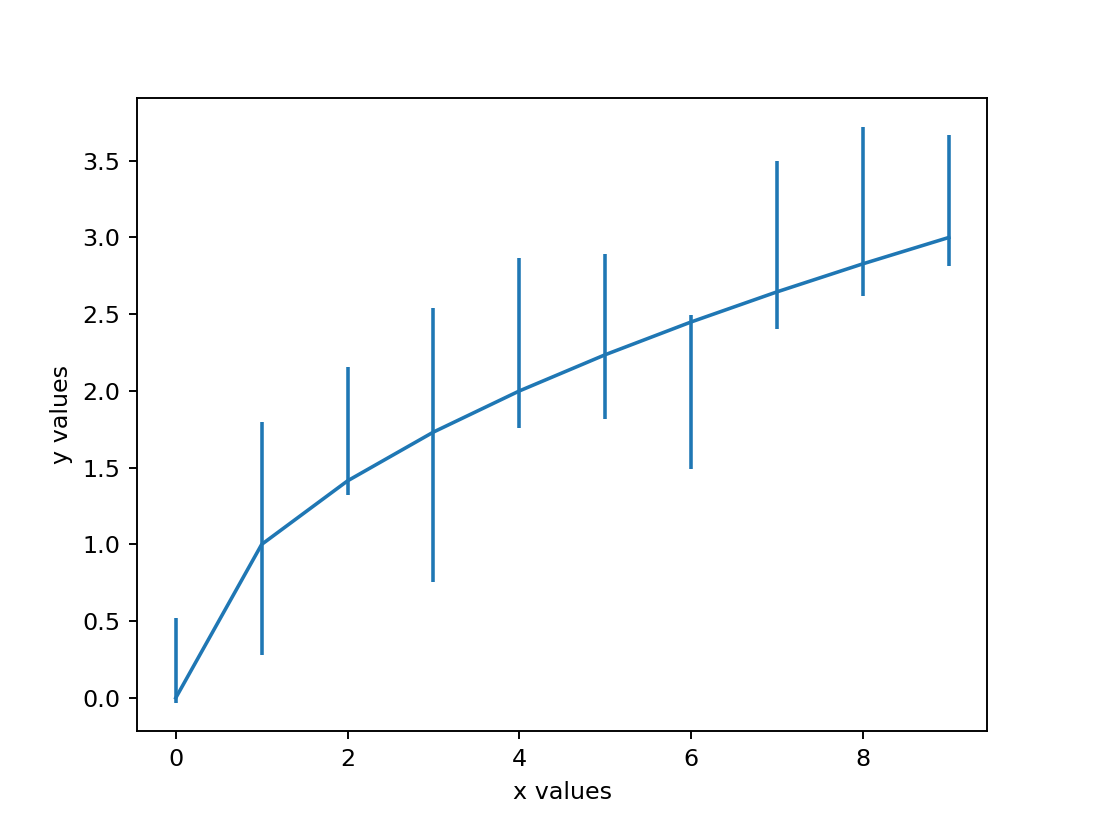

Text(0,0.5,'y values')

In [68]:
# Demonstrating an errorbar plot
x = np.arange(10) # x = [0, 1, ..., 9]
y = np.sqrt(x)
yerr = np.random.random((2, 10)) # each y has an associated lower and upper error bound

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr);
ax.set_xlabel('x values')
ax.set_ylabel('y values')

<IPython.core.display.Javascript object>


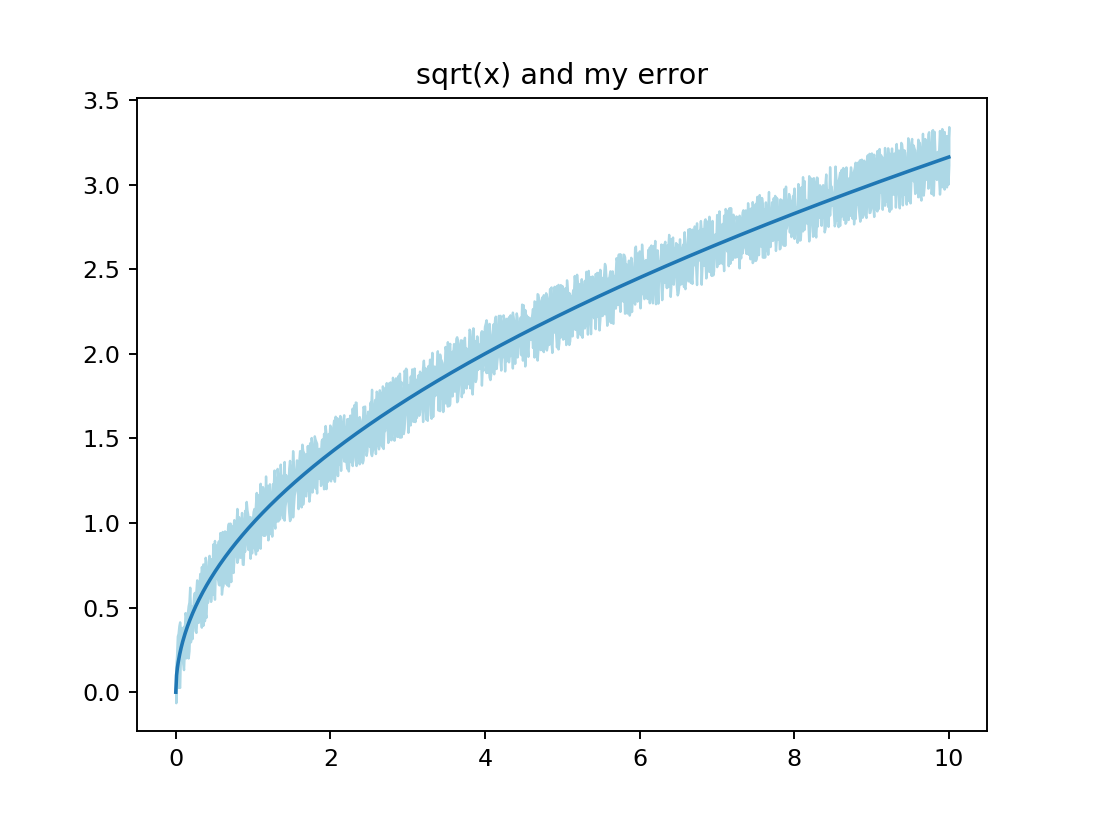

Text(0.5,1,'sqrt(x) and my error')

In [67]:
# we can also shade the region between our
# lower and upper bound error
x = np.linspace(0, 10, 1000)
y = np.sqrt(x)
yerr = np.random.random((2, 1000))*0.2

fig, ax = plt.subplots()
ax.plot(x, y)
ax.fill_between(x, y-yerr[0], y+yerr[1], color='lightblue');
ax.set_title('sqrt(x) and my error')

There are many other plot types, such as `pie`, and `bar` that you can explore in matplotlib's [axes object](https://matplotlib.org/api/axes_api.html#basic).

## Displaying Images

Matplotlib also provides functionality for displaying images. Here, 'image' can be anything that "looks like" an image. For example, a 2D array can be interpreted as a grayscale image where the rows and columns are pixel locations and the values are intensity. An image can also be $r \times c \times 3$, where $r$ and $c$ are row and column and 3 indicates 3 channels for red, green, and blue (RGB) values.

Lets plot some of these:

In [89]:
255/20

12.75

<IPython.core.display.Javascript object>


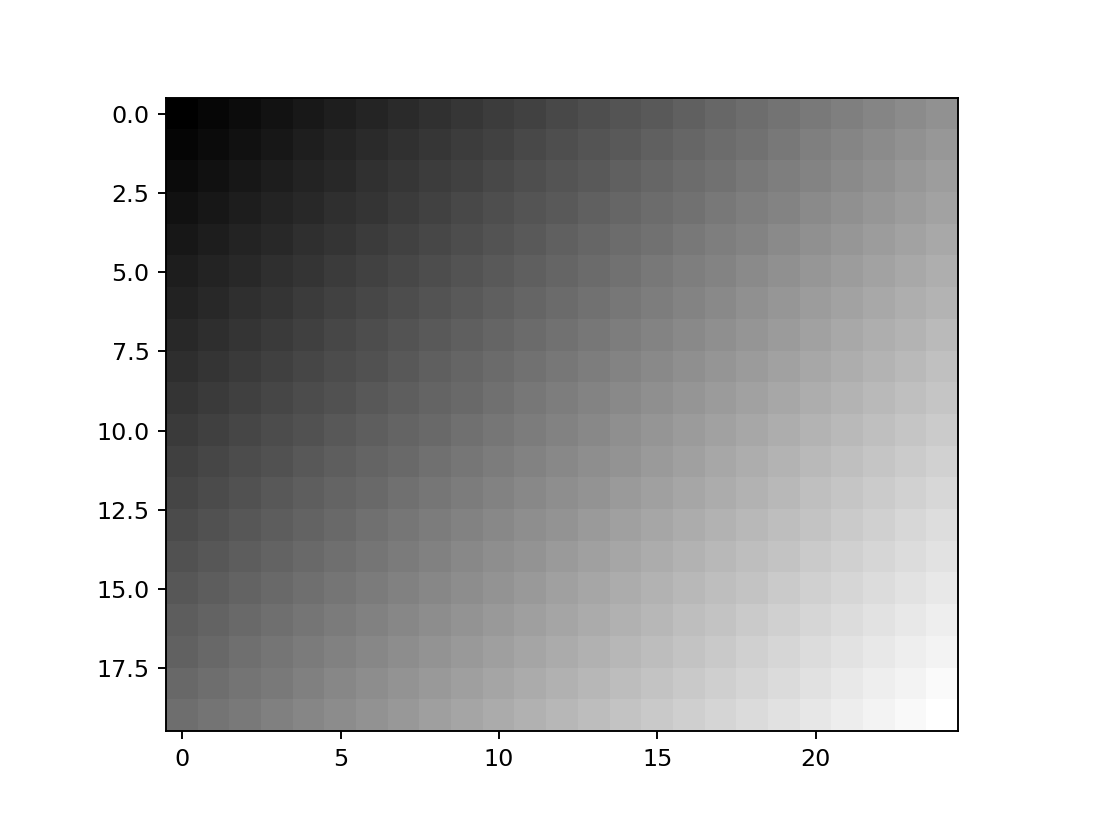

In [77]:
import matplotlib.pyplot as plt
%matplotlib notebook

# display a grayscale image
fig, ax = plt.subplots()
my_image = np.array([i+np.linspace(0, 25, 25) for i in range(20)])
plt.imshow(my_image, cmap='gray'); # cmap chooses a color map

In [94]:
np.shape(r)

(100,)

<IPython.core.display.Javascript object>


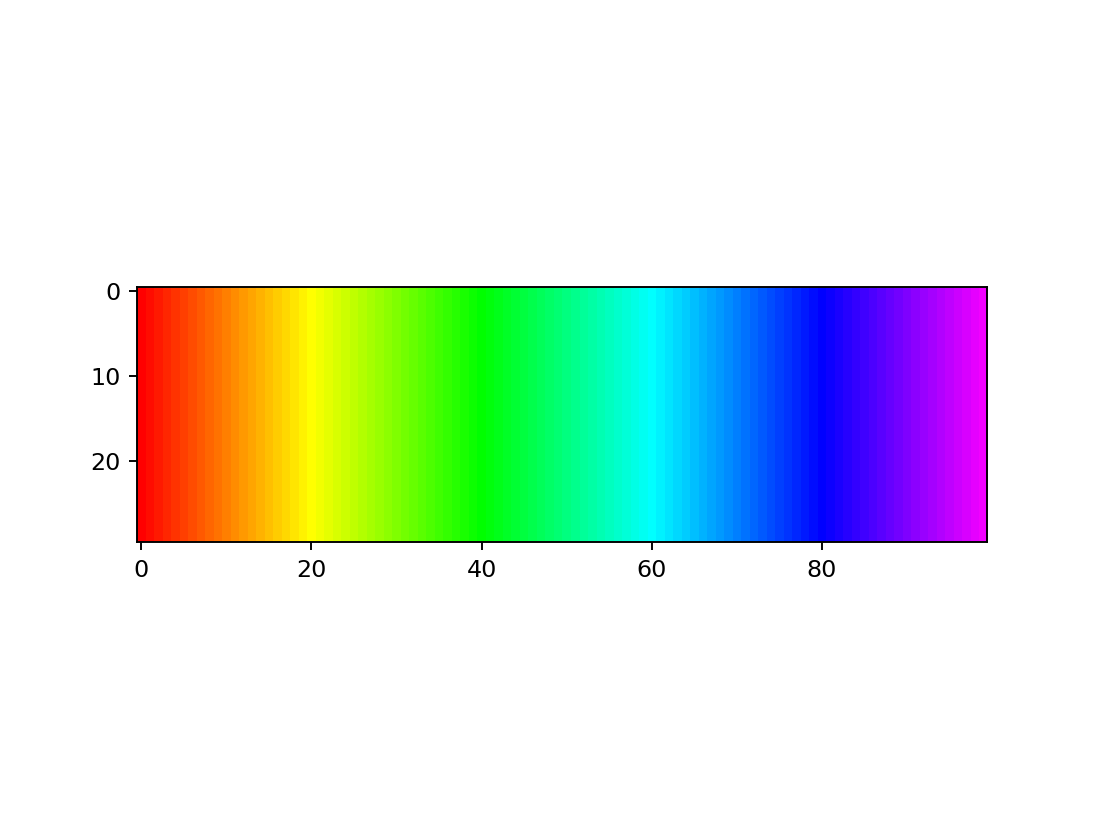

In [103]:
# display an RGB image
my_image = np.zeros((30, 100, 3)) # my_image is 30x100x3

r = [255 for i in range(20)] + \
    [255-12.75*i for i in range(20)] + \
    [0 for i in range(40)] + \
    [12.75*i for i in range(20)]
    
g = [12.75*i for i in range(20)] + \
    [255 for i in range(40)] + \
    [255-12.75*i for i in range(20)] + \
    [0 for i in range(20)]
    
b = [0 for i in range(40)] + \
    [12.75*i for i in range(20)] + \
    [255 for i in range(40)]

# set the red channel values
my_image[:,:,0] = [r for _ in range(30)]

# set the green channel values
my_image[:,:,1] = [g for _ in range(30)]

# set the blue channel values
my_image[:,:,2] = [b for _ in range(30)]

fig, ax = plt.subplots()
ax.imshow(my_image.astype('uint8'));

## Saving Figures